In [57]:
import warnings
warnings.filterwarnings('ignore')
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Dropout, Flatten
from keras.optimizers import Adam

In [58]:
With_Helmet_Path = "C:/Users/Asus ROG/OneDrive/Desktop/Projects/7th sem project/Final Dataset/With Helmet"
Without_Helmet_Path = "C:/Users/Asus ROG/OneDrive/Desktop/Projects/7th sem project/Final Dataset/Without Helmet"

In [59]:
path = "C:/Users/Asus ROG/OneDrive/Desktop/Projects/7th sem project/Final Dataset"
images=[]
status = ["With Helmet", "Without Helmet"]
classNo = []
testRatio=0.2
valRatio=0.2
imgDimension=(32,32,3)

myList=os.listdir(path)

numOfClasses=len(myList)

for itr in status:
    myPicList = os.listdir(path+"/"+ itr)

    for y in myPicList:
        curImg=cv2.imread(path+"/"+ itr +"/"+y)
        curImg=cv2.resize(curImg,(imgDimension[0],imgDimension[1]))
        images.append(curImg)
        
        if itr == "With Helmet":
            classNo.append(0)
        else:
            classNo.append(1)

images=np.array(images)
classNo=np.array(classNo)

In [60]:
images = np.array(images, dtype=np.uint8)

In [61]:
#########Spliting The Data###########

x_train, x_test, y_train, y_test=train_test_split(images, classNo, test_size=testRatio)
x_train, x_validation, y_train, y_validation=train_test_split(x_train, y_train, test_size=valRatio)

In [62]:
print(x_train[0].shape)

(32, 32, 3)


In [63]:
print(type(x_train))

<class 'numpy.ndarray'>


In [64]:
print(f"{len(x_train)} {len(x_test)} {len(y_train)} {len(y_test)}")

917 287 917 287


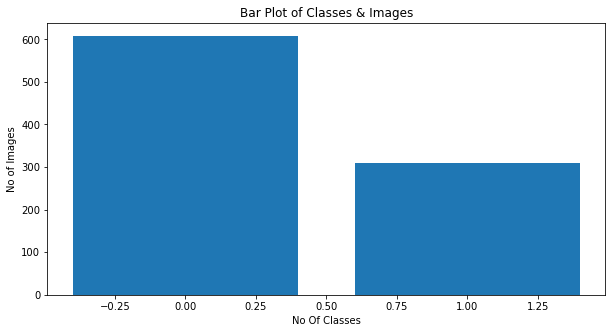

Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_300 (Conv2D)          (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_301 (Conv2D)          (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_150 (MaxPoolin (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_302 (Conv2D)          (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_303 (Conv2D)          (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_151 (MaxPoolin (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_150 (Dropout)        (None, 5, 5, 64)        

In [65]:
# # print(x_train.shape)

numOfSample=[]

for x in range(0,numOfClasses):
    numOfSample.append(len(np.where(y_train==x)[0]))


plt.figure(figsize=(10,5))
plt.bar(range(0, numOfClasses),numOfSample)
plt.title("Bar Plot of Classes & Images")
plt.xlabel("No Of Classes")
plt.ylabel("No of Images")
plt.show()


def preprocessing(img):
    img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img=cv2.equalizeHist(img)
    img=img/255
    return img


x_train=np.array(list(map(preprocessing, x_train)))
x_test=np.array(list(map(preprocessing, x_test)))
x_validation=np.array(list(map(preprocessing, x_validation)))





x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2],1)
x_test=x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2],1)
x_validation=x_validation.reshape(x_validation.shape[0], x_validation.shape[1], x_validation.shape[2],1)


dataGen=ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.1,
    rotation_range=10)

dataGen.fit(x_train)

y_train=to_categorical(y_train, numOfClasses)
y_test=to_categorical(y_test, numOfClasses)
y_validation=to_categorical(y_validation, numOfClasses)


def myModel():
    sizeOfFilter1=(3,3)
    sizeOfFilter2=(3,3)
    sizeOfPool=(2,2)

    model=Sequential()
    model.add((Conv2D(32, sizeOfFilter1, input_shape=(imgDimension[0],imgDimension[1],1),activation='relu')))
    model.add((Conv2D(32, sizeOfFilter1,activation='relu')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))

    model.add((Conv2D(64, sizeOfFilter2,activation='relu')))
    model.add((Conv2D(64, sizeOfFilter2,activation='relu')))
    model.add(MaxPooling2D(pool_size=sizeOfPool))
    model.add(Dropout(0.5))


    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(numOfClasses, activation='softmax'))
    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

model=myModel()
print(model.summary())



In [68]:
model = myModel()
model.fit(x_train, y_train, batch_size = 20, epochs = 75)
history = model.evaluate(x_test, y_test)
print(100*history[1])

Epoch 1/75
46/46 [==============================] - 1s 29ms/step - loss: 0.6250 - accuracy: 0.6521
Epoch 2/75
46/46 [==============================] - 1s 29ms/step - loss: 0.5440 - accuracy: 0.7263
Epoch 3/75
46/46 [==============================] - 1s 29ms/step - loss: 0.4763 - accuracy: 0.7764
Epoch 4/75
46/46 [==============================] - 1s 27ms/step - loss: 0.4580 - accuracy: 0.7917
Epoch 5/75
46/46 [==============================] - 1s 28ms/step - loss: 0.4384 - accuracy: 0.8048
Epoch 6/75
46/46 [==============================] - 1s 28ms/step - loss: 0.4420 - accuracy: 0.7972
Epoch 7/75
46/46 [==============================] - 1s 29ms/step - loss: 0.4108 - accuracy: 0.8081
Epoch 8/75
46/46 [==============================] - 1s 29ms/step - loss: 0.3834 - accuracy: 0.8157
Epoch 9/75
46/46 [==============================] - 1s 29ms/step - loss: 0.3602 - accuracy: 0.8506
Epoch 10/75
46/46 [==============================] - 1s 28ms/step - loss: 0.3631 - accuracy: 0.8441
Epoch 11/

In [44]:
model.save("ModelWeight.h5")

In [69]:
accuracyList = []
finalEpochValue = 0
maxAccuracy = 0

for i in range(1,100):
    model = myModel()
    model.fit(x_train, y_train, batch_size = 20, epochs = i)
    
    score = model.evaluate(x_test, y_test)
    accuracyList.append(score[1]*100);
    
    if score[1]*100 > maxAccuracy:
        maxAccuracy = score[1]*100
        finalEpochValue = i
        model.save("ModelWeight.h5")

9/9 [==============================] - 0s 7ms/step - loss: 0.5631 - accuracy: 0.6655
Epoch 1/2
46/46 [==============================] - 1s 31ms/step - loss: 0.6519 - accuracy: 0.6619
Epoch 2/2
9/9 [==============================] - 0s 7ms/step - loss: 0.5557 - accuracy: 0.6794
Epoch 1/3
46/46 [==============================] - 1s 29ms/step - loss: 0.6326 - accuracy: 0.6609
Epoch 2/3
46/46 [==============================] - 1s 30ms/step - loss: 0.5775 - accuracy: 0.6859
Epoch 3/3
9/9 [==============================] - 0s 7ms/step - loss: 0.5257 - accuracy: 0.7909
Epoch 1/4
46/46 [==============================] - 1s 30ms/step - loss: 0.6383 - accuracy: 0.6499
Epoch 2/4
46/46 [==============================] - 1s 31ms/step - loss: 0.5429 - accuracy: 0.7219
Epoch 3/4
46/46 [==============================] - 1s 28ms/step - loss: 0.4920 - accuracy: 0.7666
Epoch 4/4
9/9 [==============================] - 0s 8ms/step - loss: 0.4779 - accuracy: 0.7700
Epoch 1/5
46/46 [=========================

46/46 [==============================] - 1s 27ms/step - loss: 0.3935 - accuracy: 0.8332
Epoch 9/12
46/46 [==============================] - 1s 28ms/step - loss: 0.3659 - accuracy: 0.8517
Epoch 10/12
46/46 [==============================] - 1s 27ms/step - loss: 0.3348 - accuracy: 0.8528
Epoch 11/12
46/46 [==============================] - 1s 28ms/step - loss: 0.3388 - accuracy: 0.8691
Epoch 12/12
9/9 [==============================] - 0s 7ms/step - loss: 0.3706 - accuracy: 0.8432
Epoch 1/13
46/46 [==============================] - 1s 27ms/step - loss: 0.6343 - accuracy: 0.6554
Epoch 2/13
46/46 [==============================] - 1s 28ms/step - loss: 0.5534 - accuracy: 0.7121
Epoch 3/13
46/46 [==============================] - 1s 26ms/step - loss: 0.5292 - accuracy: 0.7405
Epoch 4/13
46/46 [==============================] - 1s 27ms/step - loss: 0.4565 - accuracy: 0.7972
Epoch 5/13
46/46 [==============================] - 1s 26ms/step - loss: 0.4554 - accuracy: 0.7983
Epoch 6/13
46/46 [===

46/46 [==============================] - 1s 27ms/step - loss: 0.2978 - accuracy: 0.8713
Epoch 16/17
46/46 [==============================] - 1s 27ms/step - loss: 0.2646 - accuracy: 0.8855
Epoch 17/17
9/9 [==============================] - 0s 8ms/step - loss: 0.4003 - accuracy: 0.8711
Epoch 1/18
46/46 [==============================] - 1s 27ms/step - loss: 0.6247 - accuracy: 0.6609
Epoch 2/18
46/46 [==============================] - 1s 28ms/step - loss: 0.5307 - accuracy: 0.7165
Epoch 3/18
46/46 [==============================] - 1s 28ms/step - loss: 0.4693 - accuracy: 0.7874
Epoch 4/18
46/46 [==============================] - 1s 27ms/step - loss: 0.4582 - accuracy: 0.7874
Epoch 5/18
46/46 [==============================] - 1s 27ms/step - loss: 0.4445 - accuracy: 0.7775
Epoch 6/18
46/46 [==============================] - 1s 27ms/step - loss: 0.4344 - accuracy: 0.8037
Epoch 7/18
46/46 [==============================] - 1s 27ms/step - loss: 0.4003 - accuracy: 0.8233
Epoch 8/18
46/46 [====

46/46 [==============================] - 1s 27ms/step - loss: 0.2230 - accuracy: 0.9160
Epoch 20/21
46/46 [==============================] - 1s 28ms/step - loss: 0.1883 - accuracy: 0.9291
Epoch 21/21
9/9 [==============================] - 0s 6ms/step - loss: 0.4402 - accuracy: 0.8571
Epoch 1/22
46/46 [==============================] - 1s 29ms/step - loss: 0.6241 - accuracy: 0.6554
Epoch 2/22
46/46 [==============================] - 2s 34ms/step - loss: 0.5577 - accuracy: 0.7241
Epoch 3/22
46/46 [==============================] - 2s 38ms/step - loss: 0.4893 - accuracy: 0.7590
Epoch 4/22
46/46 [==============================] - 2s 34ms/step - loss: 0.5018 - accuracy: 0.7808
Epoch 5/22
46/46 [==============================] - 2s 42ms/step - loss: 0.4476 - accuracy: 0.7895
Epoch 6/22
46/46 [==============================] - 2s 35ms/step - loss: 0.4275 - accuracy: 0.8135
Epoch 7/22
46/46 [==============================] - 1s 31ms/step - loss: 0.4119 - accuracy: 0.8092
Epoch 8/22
46/46 [====

46/46 [==============================] - 2s 48ms/step - loss: 0.4091 - accuracy: 0.8244
Epoch 8/25
46/46 [==============================] - 2s 45ms/step - loss: 0.3851 - accuracy: 0.8375
Epoch 9/25
46/46 [==============================] - 2s 35ms/step - loss: 0.4098 - accuracy: 0.8277
Epoch 10/25
46/46 [==============================] - 2s 35ms/step - loss: 0.3594 - accuracy: 0.8441
Epoch 11/25
46/46 [==============================] - 2s 35ms/step - loss: 0.3360 - accuracy: 0.8582
Epoch 12/25
46/46 [==============================] - 2s 35ms/step - loss: 0.3274 - accuracy: 0.8615
Epoch 13/25
46/46 [==============================] - 2s 39ms/step - loss: 0.3077 - accuracy: 0.8691
Epoch 14/25
46/46 [==============================] - 2s 35ms/step - loss: 0.3120 - accuracy: 0.8670
Epoch 15/25
46/46 [==============================] - 2s 34ms/step - loss: 0.2664 - accuracy: 0.8920
Epoch 16/25
46/46 [==============================] - 2s 34ms/step - loss: 0.2478 - accuracy: 0.8953
Epoch 17/25
46

46/46 [==============================] - 2s 35ms/step - loss: 0.4062 - accuracy: 0.8146
Epoch 9/28
46/46 [==============================] - 2s 34ms/step - loss: 0.3768 - accuracy: 0.8342
Epoch 10/28
46/46 [==============================] - 2s 34ms/step - loss: 0.3444 - accuracy: 0.8528
Epoch 11/28
46/46 [==============================] - 2s 35ms/step - loss: 0.3631 - accuracy: 0.8332
Epoch 12/28
46/46 [==============================] - 2s 35ms/step - loss: 0.3185 - accuracy: 0.8680
Epoch 13/28
46/46 [==============================] - 2s 35ms/step - loss: 0.2977 - accuracy: 0.8713
Epoch 14/28
46/46 [==============================] - 1s 32ms/step - loss: 0.3294 - accuracy: 0.8626
Epoch 15/28
46/46 [==============================] - 2s 36ms/step - loss: 0.2765 - accuracy: 0.8822
Epoch 16/28
46/46 [==============================] - 2s 35ms/step - loss: 0.2537 - accuracy: 0.8877
Epoch 17/28
46/46 [==============================] - 2s 34ms/step - loss: 0.2381 - accuracy: 0.9062
Epoch 18/28
4

9/9 [==============================] - 0s 8ms/step - loss: 0.6161 - accuracy: 0.8014
Epoch 1/31
46/46 [==============================] - 2s 38ms/step - loss: 0.6531 - accuracy: 0.6478
Epoch 2/31
46/46 [==============================] - 2s 37ms/step - loss: 0.5791 - accuracy: 0.6696
Epoch 3/31
46/46 [==============================] - 2s 38ms/step - loss: 0.5288 - accuracy: 0.7405
Epoch 4/31
46/46 [==============================] - 2s 35ms/step - loss: 0.5089 - accuracy: 0.7579
Epoch 5/31
46/46 [==============================] - 2s 37ms/step - loss: 0.4378 - accuracy: 0.8004
Epoch 6/31
46/46 [==============================] - 2s 37ms/step - loss: 0.4356 - accuracy: 0.8048
Epoch 7/31
46/46 [==============================] - 2s 37ms/step - loss: 0.3946 - accuracy: 0.8212
Epoch 8/31
46/46 [==============================] - 2s 36ms/step - loss: 0.4176 - accuracy: 0.8113
Epoch 9/31
46/46 [==============================] - 2s 36ms/step - loss: 0.3708 - accuracy: 0.8353
Epoch 10/31
46/46 [=====

46/46 [==============================] - 2s 35ms/step - loss: 0.2281 - accuracy: 0.9128
Epoch 18/33
46/46 [==============================] - 2s 35ms/step - loss: 0.2160 - accuracy: 0.9106
Epoch 19/33
46/46 [==============================] - 2s 35ms/step - loss: 0.2064 - accuracy: 0.9226
Epoch 20/33
46/46 [==============================] - 2s 35ms/step - loss: 0.2066 - accuracy: 0.9106
Epoch 21/33
46/46 [==============================] - 2s 36ms/step - loss: 0.1816 - accuracy: 0.9324
Epoch 22/33
46/46 [==============================] - 2s 36ms/step - loss: 0.1733 - accuracy: 0.9302
Epoch 23/33
46/46 [==============================] - 2s 35ms/step - loss: 0.1537 - accuracy: 0.9400
Epoch 24/33
46/46 [==============================] - 2s 35ms/step - loss: 0.1459 - accuracy: 0.9411
Epoch 25/33
46/46 [==============================] - 2s 35ms/step - loss: 0.1325 - accuracy: 0.9509
Epoch 26/33
46/46 [==============================] - 2s 34ms/step - loss: 0.1198 - accuracy: 0.9553
Epoch 27/33


46/46 [==============================] - 2s 34ms/step - loss: 0.0884 - accuracy: 0.9673
Epoch 30/35
46/46 [==============================] - 2s 35ms/step - loss: 0.0965 - accuracy: 0.9629
Epoch 31/35
46/46 [==============================] - 2s 54ms/step - loss: 0.0926 - accuracy: 0.9662
Epoch 32/35
46/46 [==============================] - 2s 41ms/step - loss: 0.0959 - accuracy: 0.9662
Epoch 33/35
46/46 [==============================] - 2s 39ms/step - loss: 0.0751 - accuracy: 0.9738
Epoch 34/35
46/46 [==============================] - 2s 35ms/step - loss: 0.0804 - accuracy: 0.9706
Epoch 35/35
9/9 [==============================] - 0s 7ms/step - loss: 0.4695 - accuracy: 0.8293
Epoch 1/36
46/46 [==============================] - 2s 35ms/step - loss: 0.6303 - accuracy: 0.6565
Epoch 2/36
46/46 [==============================] - 2s 33ms/step - loss: 0.5696 - accuracy: 0.6685
Epoch 3/36
46/46 [==============================] - 2s 35ms/step - loss: 0.5195 - accuracy: 0.7557
Epoch 4/36
46/46 [

9/9 [==============================] - 0s 6ms/step - loss: 0.6346 - accuracy: 0.8293
Epoch 1/38
46/46 [==============================] - 2s 36ms/step - loss: 0.6399 - accuracy: 0.6641
Epoch 2/38
46/46 [==============================] - 2s 35ms/step - loss: 0.5429 - accuracy: 0.6728
Epoch 3/38
46/46 [==============================] - 2s 36ms/step - loss: 0.5193 - accuracy: 0.7797
Epoch 4/38
46/46 [==============================] - 2s 35ms/step - loss: 0.4647 - accuracy: 0.7775
Epoch 5/38
46/46 [==============================] - 2s 34ms/step - loss: 0.4517 - accuracy: 0.7884
Epoch 6/38
46/46 [==============================] - 2s 35ms/step - loss: 0.4411 - accuracy: 0.8092
Epoch 7/38
46/46 [==============================] - 2s 34ms/step - loss: 0.4009 - accuracy: 0.8233
Epoch 8/38
46/46 [==============================] - 2s 35ms/step - loss: 0.3937 - accuracy: 0.8266
Epoch 9/38
46/46 [==============================] - 2s 35ms/step - loss: 0.3793 - accuracy: 0.8353
Epoch 10/38
46/46 [=====

46/46 [==============================] - 2s 34ms/step - loss: 0.4925 - accuracy: 0.7710
Epoch 4/40
46/46 [==============================] - 2s 35ms/step - loss: 0.4777 - accuracy: 0.7808
Epoch 5/40
46/46 [==============================] - 1s 32ms/step - loss: 0.4345 - accuracy: 0.8081
Epoch 6/40
46/46 [==============================] - 2s 35ms/step - loss: 0.4292 - accuracy: 0.8157
Epoch 7/40
46/46 [==============================] - 2s 34ms/step - loss: 0.4185 - accuracy: 0.8201
Epoch 8/40
46/46 [==============================] - 2s 35ms/step - loss: 0.3796 - accuracy: 0.8321
Epoch 9/40
46/46 [==============================] - 2s 34ms/step - loss: 0.3910 - accuracy: 0.8353
Epoch 10/40
46/46 [==============================] - 2s 35ms/step - loss: 0.3536 - accuracy: 0.8353
Epoch 11/40
46/46 [==============================] - 2s 35ms/step - loss: 0.3594 - accuracy: 0.8484
Epoch 12/40
46/46 [==============================] - 2s 35ms/step - loss: 0.3296 - accuracy: 0.8528
Epoch 13/40
46/46 

46/46 [==============================] - 2s 35ms/step - loss: 0.5813 - accuracy: 0.6750
Epoch 3/42
46/46 [==============================] - 2s 35ms/step - loss: 0.4983 - accuracy: 0.7623
Epoch 4/42
46/46 [==============================] - 2s 35ms/step - loss: 0.4633 - accuracy: 0.7917
Epoch 5/42
46/46 [==============================] - 2s 35ms/step - loss: 0.4223 - accuracy: 0.8157
Epoch 6/42
46/46 [==============================] - 2s 35ms/step - loss: 0.4286 - accuracy: 0.8157
Epoch 7/42
46/46 [==============================] - 2s 35ms/step - loss: 0.4165 - accuracy: 0.8179
Epoch 8/42
46/46 [==============================] - 2s 36ms/step - loss: 0.4003 - accuracy: 0.8212
Epoch 9/42
46/46 [==============================] - 2s 37ms/step - loss: 0.3445 - accuracy: 0.8517
Epoch 10/42
46/46 [==============================] - 2s 37ms/step - loss: 0.3596 - accuracy: 0.8332
Epoch 11/42
46/46 [==============================] - 2s 36ms/step - loss: 0.3534 - accuracy: 0.8386
Epoch 12/42
46/46 [

46/46 [==============================] - 1s 31ms/step - loss: 0.0428 - accuracy: 0.9836
Epoch 42/43
46/46 [==============================] - 1s 31ms/step - loss: 0.0373 - accuracy: 0.9913
Epoch 43/43
9/9 [==============================] - 0s 7ms/step - loss: 1.1374 - accuracy: 0.8118
Epoch 1/44
46/46 [==============================] - 2s 35ms/step - loss: 0.6259 - accuracy: 0.6576
Epoch 2/44
46/46 [==============================] - 2s 33ms/step - loss: 0.5262 - accuracy: 0.7339
Epoch 3/44
46/46 [==============================] - 2s 35ms/step - loss: 0.4621 - accuracy: 0.7895
Epoch 4/44
46/46 [==============================] - 2s 35ms/step - loss: 0.4455 - accuracy: 0.7983
Epoch 5/44
46/46 [==============================] - 2s 34ms/step - loss: 0.4144 - accuracy: 0.8201
Epoch 6/44
46/46 [==============================] - 2s 36ms/step - loss: 0.3949 - accuracy: 0.8266
Epoch 7/44
46/46 [==============================] - 2s 35ms/step - loss: 0.4112 - accuracy: 0.8222
Epoch 8/44
46/46 [====

46/46 [==============================] - 2s 35ms/step - loss: 0.0770 - accuracy: 0.9706
Epoch 35/45
46/46 [==============================] - 2s 33ms/step - loss: 0.0735 - accuracy: 0.9749
Epoch 36/45
46/46 [==============================] - 2s 36ms/step - loss: 0.0708 - accuracy: 0.9771
Epoch 37/45
46/46 [==============================] - 2s 34ms/step - loss: 0.0535 - accuracy: 0.9793
Epoch 38/45
46/46 [==============================] - 2s 35ms/step - loss: 0.0576 - accuracy: 0.9826
Epoch 39/45
46/46 [==============================] - 2s 33ms/step - loss: 0.0584 - accuracy: 0.9771
Epoch 40/45
46/46 [==============================] - 2s 34ms/step - loss: 0.0572 - accuracy: 0.9793
Epoch 41/45
46/46 [==============================] - 2s 34ms/step - loss: 0.0453 - accuracy: 0.9836
Epoch 42/45
46/46 [==============================] - 2s 35ms/step - loss: 0.0296 - accuracy: 0.9891
Epoch 43/45
46/46 [==============================] - 2s 35ms/step - loss: 0.0413 - accuracy: 0.9847
Epoch 44/45


46/46 [==============================] - 2s 34ms/step - loss: 0.1430 - accuracy: 0.9477
Epoch 24/47
46/46 [==============================] - 2s 36ms/step - loss: 0.1774 - accuracy: 0.9302
Epoch 25/47
46/46 [==============================] - 2s 37ms/step - loss: 0.1244 - accuracy: 0.9564
Epoch 26/47
46/46 [==============================] - 2s 35ms/step - loss: 0.1113 - accuracy: 0.9553
Epoch 27/47
46/46 [==============================] - 2s 35ms/step - loss: 0.0989 - accuracy: 0.9597
Epoch 28/47
46/46 [==============================] - 2s 36ms/step - loss: 0.1732 - accuracy: 0.9248
Epoch 29/47
46/46 [==============================] - 2s 35ms/step - loss: 0.1304 - accuracy: 0.9455
Epoch 30/47
46/46 [==============================] - 2s 35ms/step - loss: 0.0923 - accuracy: 0.9651
Epoch 31/47
46/46 [==============================] - 2s 35ms/step - loss: 0.0972 - accuracy: 0.9716
Epoch 32/47
46/46 [==============================] - 2s 35ms/step - loss: 0.0882 - accuracy: 0.9673
Epoch 33/47


46/46 [==============================] - 1s 27ms/step - loss: 0.4015 - accuracy: 0.8353
Epoch 9/49
46/46 [==============================] - 1s 28ms/step - loss: 0.3730 - accuracy: 0.8430
Epoch 10/49
46/46 [==============================] - 1s 27ms/step - loss: 0.3505 - accuracy: 0.8550
Epoch 11/49
46/46 [==============================] - 1s 28ms/step - loss: 0.3287 - accuracy: 0.8659
Epoch 12/49
46/46 [==============================] - 1s 27ms/step - loss: 0.3301 - accuracy: 0.8604
Epoch 13/49
46/46 [==============================] - 1s 27ms/step - loss: 0.3066 - accuracy: 0.8724
Epoch 14/49
46/46 [==============================] - 1s 27ms/step - loss: 0.2855 - accuracy: 0.8822
Epoch 15/49
46/46 [==============================] - 1s 27ms/step - loss: 0.2781 - accuracy: 0.8909
Epoch 16/49
46/46 [==============================] - 1s 27ms/step - loss: 0.2818 - accuracy: 0.8855
Epoch 17/49
46/46 [==============================] - 1s 27ms/step - loss: 0.2470 - accuracy: 0.9019
Epoch 18/49
4

46/46 [==============================] - 1s 32ms/step - loss: 0.0539 - accuracy: 0.9815
Epoch 41/50
46/46 [==============================] - 1s 30ms/step - loss: 0.0487 - accuracy: 0.9826
Epoch 42/50
46/46 [==============================] - 1s 31ms/step - loss: 0.0386 - accuracy: 0.9880
Epoch 43/50
46/46 [==============================] - 2s 33ms/step - loss: 0.0467 - accuracy: 0.9804
Epoch 44/50
46/46 [==============================] - 1s 31ms/step - loss: 0.0430 - accuracy: 0.9858
Epoch 45/50
46/46 [==============================] - 1s 32ms/step - loss: 0.0378 - accuracy: 0.9869
Epoch 46/50
46/46 [==============================] - 1s 31ms/step - loss: 0.0324 - accuracy: 0.9880
Epoch 47/50
46/46 [==============================] - 1s 31ms/step - loss: 0.0310 - accuracy: 0.9858
Epoch 48/50
46/46 [==============================] - 1s 31ms/step - loss: 0.0247 - accuracy: 0.9935
Epoch 49/50
46/46 [==============================] - 1s 30ms/step - loss: 0.0665 - accuracy: 0.9749
Epoch 50/50


46/46 [==============================] - 1s 27ms/step - loss: 0.2355 - accuracy: 0.8920
Epoch 19/52
46/46 [==============================] - 1s 29ms/step - loss: 0.2251 - accuracy: 0.8975
Epoch 20/52
46/46 [==============================] - 1s 32ms/step - loss: 0.2161 - accuracy: 0.9062
Epoch 21/52
46/46 [==============================] - 1s 28ms/step - loss: 0.2251 - accuracy: 0.8997
Epoch 22/52
46/46 [==============================] - 1s 27ms/step - loss: 0.1810 - accuracy: 0.9248
Epoch 23/52
46/46 [==============================] - 1s 29ms/step - loss: 0.1778 - accuracy: 0.9117
Epoch 24/52
46/46 [==============================] - 1s 28ms/step - loss: 0.1706 - accuracy: 0.9324
Epoch 25/52
46/46 [==============================] - 1s 27ms/step - loss: 0.1690 - accuracy: 0.9291
Epoch 26/52
46/46 [==============================] - 1s 27ms/step - loss: 0.1483 - accuracy: 0.9411
Epoch 27/52
46/46 [==============================] - 1s 28ms/step - loss: 0.1465 - accuracy: 0.9400
Epoch 28/52


46/46 [==============================] - 2s 36ms/step - loss: 0.0366 - accuracy: 0.9858
Epoch 47/53
46/46 [==============================] - 2s 34ms/step - loss: 0.0564 - accuracy: 0.9771
Epoch 48/53
46/46 [==============================] - 2s 36ms/step - loss: 0.0350 - accuracy: 0.9847
Epoch 49/53
46/46 [==============================] - 2s 36ms/step - loss: 0.0394 - accuracy: 0.9913
Epoch 50/53
46/46 [==============================] - 2s 35ms/step - loss: 0.0272 - accuracy: 0.9902
Epoch 51/53
46/46 [==============================] - 2s 35ms/step - loss: 0.0502 - accuracy: 0.9858
Epoch 52/53
46/46 [==============================] - 2s 36ms/step - loss: 0.0456 - accuracy: 0.9858
Epoch 53/53
9/9 [==============================] - 0s 8ms/step - loss: 0.6776 - accuracy: 0.8258
Epoch 1/54
46/46 [==============================] - 2s 36ms/step - loss: 0.6326 - accuracy: 0.6587
Epoch 2/54
46/46 [==============================] - 2s 35ms/step - loss: 0.5890 - accuracy: 0.6663
Epoch 3/54
46/46 

46/46 [==============================] - 2s 36ms/step - loss: 0.1857 - accuracy: 0.9258
Epoch 20/55
46/46 [==============================] - 2s 35ms/step - loss: 0.1759 - accuracy: 0.9204
Epoch 21/55
46/46 [==============================] - 2s 37ms/step - loss: 0.1871 - accuracy: 0.9291
Epoch 22/55
46/46 [==============================] - 2s 36ms/step - loss: 0.1488 - accuracy: 0.9400
Epoch 23/55
46/46 [==============================] - 2s 34ms/step - loss: 0.1740 - accuracy: 0.9313
Epoch 24/55
46/46 [==============================] - 2s 35ms/step - loss: 0.1709 - accuracy: 0.9335
Epoch 25/55
46/46 [==============================] - 2s 36ms/step - loss: 0.1207 - accuracy: 0.9553
Epoch 26/55
46/46 [==============================] - 2s 35ms/step - loss: 0.1204 - accuracy: 0.9498
Epoch 27/55
46/46 [==============================] - 2s 36ms/step - loss: 0.1256 - accuracy: 0.9498
Epoch 28/55
46/46 [==============================] - 1s 32ms/step - loss: 0.0856 - accuracy: 0.9716
Epoch 29/55


46/46 [==============================] - 2s 34ms/step - loss: 0.0555 - accuracy: 0.9836
Epoch 45/56
46/46 [==============================] - 2s 35ms/step - loss: 0.0436 - accuracy: 0.9836
Epoch 46/56
46/46 [==============================] - 2s 35ms/step - loss: 0.0344 - accuracy: 0.9913
Epoch 47/56
46/46 [==============================] - 2s 35ms/step - loss: 0.0653 - accuracy: 0.9738
Epoch 48/56
46/46 [==============================] - 2s 35ms/step - loss: 0.0441 - accuracy: 0.9869
Epoch 49/56
46/46 [==============================] - 2s 34ms/step - loss: 0.0373 - accuracy: 0.9847
Epoch 50/56
46/46 [==============================] - 2s 36ms/step - loss: 0.0284 - accuracy: 0.9869
Epoch 51/56
46/46 [==============================] - 2s 34ms/step - loss: 0.0334 - accuracy: 0.9869 0s - los
Epoch 52/56
46/46 [==============================] - 2s 34ms/step - loss: 0.0408 - accuracy: 0.9847
Epoch 53/56
46/46 [==============================] - 2s 34ms/step - loss: 0.0463 - accuracy: 0.9804
Epo

46/46 [==============================] - 2s 36ms/step - loss: 0.3196 - accuracy: 0.8637
Epoch 12/58
46/46 [==============================] - 2s 36ms/step - loss: 0.3265 - accuracy: 0.8528
Epoch 13/58
46/46 [==============================] - 2s 36ms/step - loss: 0.2758 - accuracy: 0.8746
Epoch 14/58
46/46 [==============================] - 2s 36ms/step - loss: 0.2903 - accuracy: 0.8800
Epoch 15/58
46/46 [==============================] - 2s 36ms/step - loss: 0.2618 - accuracy: 0.8942
Epoch 16/58
46/46 [==============================] - 2s 36ms/step - loss: 0.2481 - accuracy: 0.8975
Epoch 17/58
46/46 [==============================] - 2s 35ms/step - loss: 0.2431 - accuracy: 0.9008
Epoch 18/58
46/46 [==============================] - 2s 38ms/step - loss: 0.1975 - accuracy: 0.9171
Epoch 19/58
46/46 [==============================] - 2s 36ms/step - loss: 0.1951 - accuracy: 0.9106
Epoch 20/58
46/46 [==============================] - 2s 33ms/step - loss: 0.1552 - accuracy: 0.9389
Epoch 21/58


46/46 [==============================] - 2s 34ms/step - loss: 0.0692 - accuracy: 0.9804
Epoch 35/59
46/46 [==============================] - 2s 35ms/step - loss: 0.0573 - accuracy: 0.9782
Epoch 36/59
46/46 [==============================] - 2s 35ms/step - loss: 0.0523 - accuracy: 0.9836
Epoch 37/59
46/46 [==============================] - 2s 34ms/step - loss: 0.0940 - accuracy: 0.9618
Epoch 38/59
46/46 [==============================] - 2s 36ms/step - loss: 0.0657 - accuracy: 0.9738
Epoch 39/59
46/46 [==============================] - 2s 36ms/step - loss: 0.0492 - accuracy: 0.9815
Epoch 40/59
46/46 [==============================] - 2s 34ms/step - loss: 0.0527 - accuracy: 0.9847
Epoch 41/59
46/46 [==============================] - 2s 35ms/step - loss: 0.0290 - accuracy: 0.9902
Epoch 42/59
46/46 [==============================] - 2s 35ms/step - loss: 0.0501 - accuracy: 0.9836
Epoch 43/59
46/46 [==============================] - 2s 35ms/step - loss: 0.0614 - accuracy: 0.9749
Epoch 44/59


46/46 [==============================] - 2s 36ms/step - loss: 0.0217 - accuracy: 0.9924
Epoch 57/60
46/46 [==============================] - 2s 36ms/step - loss: 0.0869 - accuracy: 0.9684
Epoch 58/60
46/46 [==============================] - 2s 35ms/step - loss: 0.0410 - accuracy: 0.9804
Epoch 59/60
46/46 [==============================] - 2s 35ms/step - loss: 0.0401 - accuracy: 0.9869
Epoch 60/60
9/9 [==============================] - 0s 7ms/step - loss: 0.7692 - accuracy: 0.8641
Epoch 1/61
46/46 [==============================] - 2s 34ms/step - loss: 0.6531 - accuracy: 0.6456
Epoch 2/61
46/46 [==============================] - 2s 37ms/step - loss: 0.5937 - accuracy: 0.6707
Epoch 3/61
46/46 [==============================] - 2s 35ms/step - loss: 0.5161 - accuracy: 0.7394
Epoch 4/61
46/46 [==============================] - 2s 33ms/step - loss: 0.4842 - accuracy: 0.7764
Epoch 5/61
46/46 [==============================] - 2s 35ms/step - loss: 0.4601 - accuracy: 0.7895
Epoch 6/61
46/46 [==

46/46 [==============================] - 2s 35ms/step - loss: 0.2877 - accuracy: 0.8811
Epoch 16/62
46/46 [==============================] - 2s 36ms/step - loss: 0.2763 - accuracy: 0.8888
Epoch 17/62
46/46 [==============================] - 2s 35ms/step - loss: 0.2701 - accuracy: 0.8877
Epoch 18/62
46/46 [==============================] - 2s 35ms/step - loss: 0.2403 - accuracy: 0.9062
Epoch 19/62
46/46 [==============================] - 2s 35ms/step - loss: 0.2318 - accuracy: 0.9051
Epoch 20/62
46/46 [==============================] - 2s 35ms/step - loss: 0.2092 - accuracy: 0.9106
Epoch 21/62
46/46 [==============================] - 1s 32ms/step - loss: 0.2176 - accuracy: 0.9138
Epoch 22/62
46/46 [==============================] - 1s 32ms/step - loss: 0.1880 - accuracy: 0.9280
Epoch 23/62
46/46 [==============================] - 1s 32ms/step - loss: 0.1873 - accuracy: 0.9182
Epoch 24/62
46/46 [==============================] - 2s 34ms/step - loss: 0.1548 - accuracy: 0.9411
Epoch 25/62


46/46 [==============================] - 2s 35ms/step - loss: 0.0617 - accuracy: 0.9826
Epoch 35/63
46/46 [==============================] - 2s 34ms/step - loss: 0.0679 - accuracy: 0.9738
Epoch 36/63
46/46 [==============================] - 2s 43ms/step - loss: 0.0694 - accuracy: 0.9716
Epoch 37/63
46/46 [==============================] - 2s 34ms/step - loss: 0.0922 - accuracy: 0.9651
Epoch 38/63
46/46 [==============================] - 1s 32ms/step - loss: 0.0664 - accuracy: 0.9662
Epoch 39/63
46/46 [==============================] - 2s 35ms/step - loss: 0.0767 - accuracy: 0.9727
Epoch 40/63
46/46 [==============================] - 2s 34ms/step - loss: 0.0597 - accuracy: 0.9793
Epoch 41/63
46/46 [==============================] - 2s 34ms/step - loss: 0.0523 - accuracy: 0.9760
Epoch 42/63
46/46 [==============================] - 2s 35ms/step - loss: 0.0545 - accuracy: 0.9826
Epoch 43/63
46/46 [==============================] - 2s 35ms/step - loss: 0.0762 - accuracy: 0.9793
Epoch 44/63


46/46 [==============================] - 1s 32ms/step - loss: 0.0476 - accuracy: 0.9847
Epoch 53/64
46/46 [==============================] - 1s 33ms/step - loss: 0.0323 - accuracy: 0.9913
Epoch 54/64
46/46 [==============================] - 1s 32ms/step - loss: 0.0171 - accuracy: 0.9956
Epoch 55/64
46/46 [==============================] - 1s 32ms/step - loss: 0.0290 - accuracy: 0.9891
Epoch 56/64
46/46 [==============================] - 2s 33ms/step - loss: 0.0207 - accuracy: 0.9913
Epoch 57/64
46/46 [==============================] - 2s 36ms/step - loss: 0.0554 - accuracy: 0.9749
Epoch 58/64
46/46 [==============================] - 1s 32ms/step - loss: 0.0659 - accuracy: 0.9815
Epoch 59/64
46/46 [==============================] - 1s 31ms/step - loss: 0.0392 - accuracy: 0.9847
Epoch 60/64
46/46 [==============================] - 2s 33ms/step - loss: 0.0307 - accuracy: 0.9869
Epoch 61/64
46/46 [==============================] - 1s 32ms/step - loss: 0.0144 - accuracy: 0.9924
Epoch 62/64


46/46 [==============================] - 1s 32ms/step - loss: 0.4929 - accuracy: 0.7666 0s - loss: 0.501
Epoch 4/66
46/46 [==============================] - 2s 35ms/step - loss: 0.4470 - accuracy: 0.8092
Epoch 5/66
46/46 [==============================] - 2s 34ms/step - loss: 0.4432 - accuracy: 0.7972
Epoch 6/66
46/46 [==============================] - 2s 35ms/step - loss: 0.4236 - accuracy: 0.8081
Epoch 7/66
46/46 [==============================] - 2s 35ms/step - loss: 0.3994 - accuracy: 0.8266
Epoch 8/66
46/46 [==============================] - 2s 35ms/step - loss: 0.3706 - accuracy: 0.8342
Epoch 9/66
46/46 [==============================] - 2s 34ms/step - loss: 0.3849 - accuracy: 0.8364
Epoch 10/66
46/46 [==============================] - 2s 33ms/step - loss: 0.3389 - accuracy: 0.8626
Epoch 11/66
46/46 [==============================] - 2s 35ms/step - loss: 0.3578 - accuracy: 0.8571
Epoch 12/66
46/46 [==============================] - 2s 35ms/step - loss: 0.3258 - accuracy: 0.8495
E

Epoch 18/67
46/46 [==============================] - 2s 36ms/step - loss: 0.2409 - accuracy: 0.8986
Epoch 19/67
46/46 [==============================] - 2s 34ms/step - loss: 0.2146 - accuracy: 0.9019
Epoch 20/67
46/46 [==============================] - 2s 35ms/step - loss: 0.2161 - accuracy: 0.8986
Epoch 21/67
46/46 [==============================] - 2s 34ms/step - loss: 0.1766 - accuracy: 0.9237
Epoch 22/67
46/46 [==============================] - 2s 35ms/step - loss: 0.1654 - accuracy: 0.9280
Epoch 23/67
46/46 [==============================] - 2s 37ms/step - loss: 0.1550 - accuracy: 0.9433
Epoch 24/67
46/46 [==============================] - 2s 36ms/step - loss: 0.1386 - accuracy: 0.9411
Epoch 25/67
46/46 [==============================] - 2s 38ms/step - loss: 0.1456 - accuracy: 0.9477
Epoch 26/67
46/46 [==============================] - 2s 35ms/step - loss: 0.1295 - accuracy: 0.9564
Epoch 27/67
46/46 [==============================] - 2s 35ms/step - loss: 0.1041 - accuracy: 0.9597


46/46 [==============================] - 2s 37ms/step - loss: 0.0758 - accuracy: 0.9738
Epoch 33/68
46/46 [==============================] - 2s 35ms/step - loss: 0.0680 - accuracy: 0.9727
Epoch 34/68
46/46 [==============================] - 2s 36ms/step - loss: 0.0685 - accuracy: 0.9749
Epoch 35/68
46/46 [==============================] - 2s 36ms/step - loss: 0.0578 - accuracy: 0.9749
Epoch 36/68
46/46 [==============================] - 2s 35ms/step - loss: 0.0614 - accuracy: 0.9793
Epoch 37/68
46/46 [==============================] - 2s 36ms/step - loss: 0.0469 - accuracy: 0.9891
Epoch 38/68
46/46 [==============================] - 2s 35ms/step - loss: 0.0509 - accuracy: 0.9782
Epoch 39/68
46/46 [==============================] - 2s 36ms/step - loss: 0.0744 - accuracy: 0.9749
Epoch 40/68
46/46 [==============================] - 2s 35ms/step - loss: 0.0530 - accuracy: 0.9815
Epoch 41/68
46/46 [==============================] - 2s 34ms/step - loss: 0.0611 - accuracy: 0.9815
Epoch 42/68


46/46 [==============================] - 2s 35ms/step - loss: 0.0752 - accuracy: 0.9738
Epoch 46/69
46/46 [==============================] - 1s 31ms/step - loss: 0.0385 - accuracy: 0.9880
Epoch 47/69
46/46 [==============================] - 1s 32ms/step - loss: 0.0231 - accuracy: 0.9935
Epoch 48/69
46/46 [==============================] - 1s 31ms/step - loss: 0.0285 - accuracy: 0.9891
Epoch 49/69
46/46 [==============================] - 1s 32ms/step - loss: 0.0527 - accuracy: 0.9782
Epoch 50/69
46/46 [==============================] - 2s 38ms/step - loss: 0.0385 - accuracy: 0.9815
Epoch 51/69
46/46 [==============================] - 2s 36ms/step - loss: 0.0294 - accuracy: 0.9880
Epoch 52/69
46/46 [==============================] - 2s 34ms/step - loss: 0.0695 - accuracy: 0.9782
Epoch 53/69
46/46 [==============================] - 2s 35ms/step - loss: 0.0391 - accuracy: 0.9858
Epoch 54/69
46/46 [==============================] - 2s 35ms/step - loss: 0.0142 - accuracy: 0.9956
Epoch 55/69


46/46 [==============================] - 2s 33ms/step - loss: 0.0284 - accuracy: 0.9902
Epoch 57/70
46/46 [==============================] - 2s 33ms/step - loss: 0.0312 - accuracy: 0.9935
Epoch 58/70
46/46 [==============================] - 3s 55ms/step - loss: 0.0275 - accuracy: 0.9891
Epoch 59/70
46/46 [==============================] - 2s 36ms/step - loss: 0.0142 - accuracy: 0.9956
Epoch 60/70
46/46 [==============================] - 2s 33ms/step - loss: 0.0464 - accuracy: 0.9847
Epoch 61/70
46/46 [==============================] - 2s 36ms/step - loss: 0.0208 - accuracy: 0.9935
Epoch 62/70
46/46 [==============================] - 2s 33ms/step - loss: 0.0260 - accuracy: 0.9913
Epoch 63/70
46/46 [==============================] - 2s 33ms/step - loss: 0.0343 - accuracy: 0.9902
Epoch 64/70
46/46 [==============================] - 2s 34ms/step - loss: 0.0304 - accuracy: 0.9902
Epoch 65/70
46/46 [==============================] - 2s 35ms/step - loss: 0.0323 - accuracy: 0.9836
Epoch 66/70


46/46 [==============================] - 2s 34ms/step - loss: 0.0380 - accuracy: 0.9869
Epoch 68/71
46/46 [==============================] - 2s 34ms/step - loss: 0.0162 - accuracy: 0.9956
Epoch 69/71
46/46 [==============================] - 2s 34ms/step - loss: 0.0256 - accuracy: 0.9902
Epoch 70/71
46/46 [==============================] - 2s 35ms/step - loss: 0.0311 - accuracy: 0.9858
Epoch 71/71
9/9 [==============================] - 0s 7ms/step - loss: 0.8436 - accuracy: 0.8955
Epoch 1/72
46/46 [==============================] - 2s 35ms/step - loss: 0.6433 - accuracy: 0.6543
Epoch 2/72
46/46 [==============================] - 2s 36ms/step - loss: 0.5597 - accuracy: 0.6859
Epoch 3/72
46/46 [==============================] - 2s 34ms/step - loss: 0.5229 - accuracy: 0.7426
Epoch 4/72
46/46 [==============================] - 2s 35ms/step - loss: 0.4514 - accuracy: 0.7884
Epoch 5/72
46/46 [==============================] - 2s 35ms/step - loss: 0.4237 - accuracy: 0.8103
Epoch 6/72
46/46 [==

46/46 [==============================] - 2s 35ms/step - loss: 0.4943 - accuracy: 0.7655
Epoch 5/73
46/46 [==============================] - 2s 35ms/step - loss: 0.4407 - accuracy: 0.8048
Epoch 6/73
46/46 [==============================] - 2s 35ms/step - loss: 0.4351 - accuracy: 0.8059
Epoch 7/73
46/46 [==============================] - 2s 34ms/step - loss: 0.4144 - accuracy: 0.8233
Epoch 8/73
46/46 [==============================] - 2s 33ms/step - loss: 0.4120 - accuracy: 0.8233
Epoch 9/73
46/46 [==============================] - 2s 34ms/step - loss: 0.3755 - accuracy: 0.8451
Epoch 10/73
46/46 [==============================] - 2s 34ms/step - loss: 0.3975 - accuracy: 0.8277
Epoch 11/73
46/46 [==============================] - 2s 35ms/step - loss: 0.3490 - accuracy: 0.8397
Epoch 12/73
46/46 [==============================] - 2s 34ms/step - loss: 0.3030 - accuracy: 0.8680 0s - loss: 0.2985 - accuracy: 0.86
Epoch 13/73
46/46 [==============================] - 2s 35ms/step - loss: 0.2904 -

Epoch 12/74
46/46 [==============================] - 2s 34ms/step - loss: 0.2987 - accuracy: 0.8833
Epoch 13/74
46/46 [==============================] - 2s 35ms/step - loss: 0.3055 - accuracy: 0.8800
Epoch 14/74
46/46 [==============================] - 2s 35ms/step - loss: 0.2782 - accuracy: 0.8866
Epoch 15/74
46/46 [==============================] - 2s 35ms/step - loss: 0.2559 - accuracy: 0.8888
Epoch 16/74
46/46 [==============================] - 2s 35ms/step - loss: 0.2533 - accuracy: 0.8877
Epoch 17/74
46/46 [==============================] - 1s 32ms/step - loss: 0.2147 - accuracy: 0.9204
Epoch 18/74
46/46 [==============================] - 1s 32ms/step - loss: 0.2458 - accuracy: 0.8942
Epoch 19/74
46/46 [==============================] - 1s 32ms/step - loss: 0.2003 - accuracy: 0.9138
Epoch 20/74
46/46 [==============================] - 1s 32ms/step - loss: 0.1683 - accuracy: 0.9335
Epoch 21/74
46/46 [==============================] - 1s 32ms/step - loss: 0.1700 - accuracy: 0.9324


46/46 [==============================] - 2s 34ms/step - loss: 0.2201 - accuracy: 0.9095
Epoch 20/75
46/46 [==============================] - 2s 36ms/step - loss: 0.2255 - accuracy: 0.9008
Epoch 21/75
46/46 [==============================] - 2s 35ms/step - loss: 0.2360 - accuracy: 0.9171
Epoch 22/75
46/46 [==============================] - 2s 34ms/step - loss: 0.1863 - accuracy: 0.9269
Epoch 23/75
46/46 [==============================] - 2s 35ms/step - loss: 0.1569 - accuracy: 0.9346
Epoch 24/75
46/46 [==============================] - 2s 34ms/step - loss: 0.1489 - accuracy: 0.9400
Epoch 25/75
46/46 [==============================] - 2s 35ms/step - loss: 0.1414 - accuracy: 0.9411
Epoch 26/75
46/46 [==============================] - 2s 35ms/step - loss: 0.1260 - accuracy: 0.9411
Epoch 27/75
46/46 [==============================] - 2s 33ms/step - loss: 0.1137 - accuracy: 0.9575
Epoch 28/75
46/46 [==============================] - 2s 34ms/step - loss: 0.1265 - accuracy: 0.9498
Epoch 29/75


46/46 [==============================] - 2s 33ms/step - loss: 0.1484 - accuracy: 0.9357
Epoch 26/76
46/46 [==============================] - 2s 34ms/step - loss: 0.1347 - accuracy: 0.9455
Epoch 27/76
46/46 [==============================] - 2s 35ms/step - loss: 0.1143 - accuracy: 0.9586
Epoch 28/76
46/46 [==============================] - 2s 35ms/step - loss: 0.1237 - accuracy: 0.9553
Epoch 29/76
46/46 [==============================] - 2s 36ms/step - loss: 0.1307 - accuracy: 0.9542
Epoch 30/76
46/46 [==============================] - 2s 35ms/step - loss: 0.1168 - accuracy: 0.9586
Epoch 31/76
46/46 [==============================] - 2s 34ms/step - loss: 0.0933 - accuracy: 0.9651
Epoch 32/76
46/46 [==============================] - 2s 35ms/step - loss: 0.0852 - accuracy: 0.9662
Epoch 33/76
46/46 [==============================] - 2s 35ms/step - loss: 0.0905 - accuracy: 0.9662
Epoch 34/76
46/46 [==============================] - 2s 35ms/step - loss: 0.1025 - accuracy: 0.9575
Epoch 35/76


46/46 [==============================] - 2s 34ms/step - loss: 0.0919 - accuracy: 0.9673
Epoch 31/77
46/46 [==============================] - 1s 32ms/step - loss: 0.1393 - accuracy: 0.9411
Epoch 32/77
46/46 [==============================] - 1s 32ms/step - loss: 0.0791 - accuracy: 0.9706
Epoch 33/77
46/46 [==============================] - 2s 33ms/step - loss: 0.0828 - accuracy: 0.9662
Epoch 34/77
46/46 [==============================] - 2s 36ms/step - loss: 0.0985 - accuracy: 0.9695
Epoch 35/77
46/46 [==============================] - 2s 34ms/step - loss: 0.0667 - accuracy: 0.9782
Epoch 36/77
46/46 [==============================] - 2s 34ms/step - loss: 0.0583 - accuracy: 0.9771
Epoch 37/77
46/46 [==============================] - 2s 37ms/step - loss: 0.0776 - accuracy: 0.9782
Epoch 38/77
46/46 [==============================] - 2s 37ms/step - loss: 0.0539 - accuracy: 0.9869
Epoch 39/77
46/46 [==============================] - 2s 35ms/step - loss: 0.0608 - accuracy: 0.9815
Epoch 40/77


46/46 [==============================] - 2s 34ms/step - loss: 0.0646 - accuracy: 0.9771
Epoch 35/78
46/46 [==============================] - 2s 34ms/step - loss: 0.0522 - accuracy: 0.9847
Epoch 36/78
46/46 [==============================] - 2s 34ms/step - loss: 0.0891 - accuracy: 0.9695
Epoch 37/78
46/46 [==============================] - 2s 34ms/step - loss: 0.0663 - accuracy: 0.9793
Epoch 38/78
46/46 [==============================] - 2s 36ms/step - loss: 0.0816 - accuracy: 0.9662
Epoch 39/78
46/46 [==============================] - 2s 35ms/step - loss: 0.0648 - accuracy: 0.9749
Epoch 40/78
46/46 [==============================] - 2s 35ms/step - loss: 0.0445 - accuracy: 0.9826
Epoch 41/78
46/46 [==============================] - 2s 35ms/step - loss: 0.0539 - accuracy: 0.9804
Epoch 42/78
46/46 [==============================] - 2s 35ms/step - loss: 0.0456 - accuracy: 0.9836
Epoch 43/78
46/46 [==============================] - 2s 36ms/step - loss: 0.0358 - accuracy: 0.9847
Epoch 44/78


46/46 [==============================] - 2s 35ms/step - loss: 0.0834 - accuracy: 0.9684
Epoch 37/79
46/46 [==============================] - 2s 35ms/step - loss: 0.0692 - accuracy: 0.9749
Epoch 38/79
46/46 [==============================] - 2s 36ms/step - loss: 0.0617 - accuracy: 0.9782
Epoch 39/79
46/46 [==============================] - 2s 35ms/step - loss: 0.0389 - accuracy: 0.9847
Epoch 40/79
46/46 [==============================] - 2s 36ms/step - loss: 0.0748 - accuracy: 0.9738
Epoch 41/79
46/46 [==============================] - 2s 37ms/step - loss: 0.0908 - accuracy: 0.9673
Epoch 42/79
46/46 [==============================] - 2s 36ms/step - loss: 0.0480 - accuracy: 0.9815
Epoch 43/79
46/46 [==============================] - 2s 35ms/step - loss: 0.0219 - accuracy: 0.9935
Epoch 44/79
46/46 [==============================] - 2s 35ms/step - loss: 0.0272 - accuracy: 0.9880
Epoch 45/79
46/46 [==============================] - 2s 34ms/step - loss: 0.0496 - accuracy: 0.9836
Epoch 46/79


Epoch 38/80
46/46 [==============================] - 1s 32ms/step - loss: 0.0546 - accuracy: 0.9760
Epoch 39/80
46/46 [==============================] - 2s 35ms/step - loss: 0.0565 - accuracy: 0.9771
Epoch 40/80
46/46 [==============================] - 2s 36ms/step - loss: 0.0505 - accuracy: 0.9815 0s - loss: 0.0
Epoch 41/80
46/46 [==============================] - 2s 35ms/step - loss: 0.0305 - accuracy: 0.9902
Epoch 42/80
46/46 [==============================] - 2s 35ms/step - loss: 0.0437 - accuracy: 0.9836
Epoch 43/80
46/46 [==============================] - 2s 35ms/step - loss: 0.0408 - accuracy: 0.9836
Epoch 44/80
46/46 [==============================] - 2s 36ms/step - loss: 0.0843 - accuracy: 0.9716
Epoch 45/80
46/46 [==============================] - 2s 34ms/step - loss: 0.0947 - accuracy: 0.9673
Epoch 46/80
46/46 [==============================] - 2s 34ms/step - loss: 0.0517 - accuracy: 0.9793
Epoch 47/80
46/46 [==============================] - 2s 35ms/step - loss: 0.0791 - ac

46/46 [==============================] - 2s 35ms/step - loss: 0.0987 - accuracy: 0.9629
Epoch 39/81
46/46 [==============================] - 1s 32ms/step - loss: 0.0594 - accuracy: 0.9804
Epoch 40/81
46/46 [==============================] - 2s 35ms/step - loss: 0.0917 - accuracy: 0.9651
Epoch 41/81
46/46 [==============================] - 2s 35ms/step - loss: 0.0583 - accuracy: 0.9738
Epoch 42/81
46/46 [==============================] - 2s 35ms/step - loss: 0.0485 - accuracy: 0.9836
Epoch 43/81
46/46 [==============================] - 2s 35ms/step - loss: 0.0469 - accuracy: 0.9804
Epoch 44/81
46/46 [==============================] - 2s 34ms/step - loss: 0.0503 - accuracy: 0.9771
Epoch 45/81
46/46 [==============================] - 2s 34ms/step - loss: 0.0576 - accuracy: 0.9782
Epoch 46/81
46/46 [==============================] - 2s 34ms/step - loss: 0.0318 - accuracy: 0.9880
Epoch 47/81
46/46 [==============================] - 2s 34ms/step - loss: 0.0529 - accuracy: 0.9782
Epoch 48/81


46/46 [==============================] - 2s 35ms/step - loss: 0.0707 - accuracy: 0.9749
Epoch 38/82
46/46 [==============================] - 2s 34ms/step - loss: 0.0547 - accuracy: 0.9847
Epoch 39/82
46/46 [==============================] - 2s 35ms/step - loss: 0.0731 - accuracy: 0.9695
Epoch 40/82
46/46 [==============================] - 2s 35ms/step - loss: 0.0483 - accuracy: 0.9836 0s - loss: 0.0533 - accuracy
Epoch 41/82
46/46 [==============================] - 2s 34ms/step - loss: 0.0495 - accuracy: 0.9815
Epoch 42/82
46/46 [==============================] - 2s 34ms/step - loss: 0.0486 - accuracy: 0.9836
Epoch 43/82
46/46 [==============================] - 2s 35ms/step - loss: 0.0617 - accuracy: 0.9749
Epoch 44/82
46/46 [==============================] - 2s 34ms/step - loss: 0.0488 - accuracy: 0.9826 0s - loss: 0.0528 - ac
Epoch 45/82
46/46 [==============================] - 2s 35ms/step - loss: 0.0495 - accuracy: 0.9815
Epoch 46/82
46/46 [==============================] - 2s 34ms

46/46 [==============================] - 1s 31ms/step - loss: 0.0695 - accuracy: 0.9727
Epoch 36/83
46/46 [==============================] - 2s 33ms/step - loss: 0.0769 - accuracy: 0.9716
Epoch 37/83
46/46 [==============================] - 2s 33ms/step - loss: 0.0499 - accuracy: 0.9815
Epoch 38/83
46/46 [==============================] - 2s 33ms/step - loss: 0.0809 - accuracy: 0.9684
Epoch 39/83
46/46 [==============================] - 2s 36ms/step - loss: 0.0678 - accuracy: 0.9749
Epoch 40/83
46/46 [==============================] - 2s 34ms/step - loss: 0.0443 - accuracy: 0.9826
Epoch 41/83
46/46 [==============================] - 2s 35ms/step - loss: 0.0847 - accuracy: 0.9673
Epoch 42/83
46/46 [==============================] - 2s 33ms/step - loss: 0.0625 - accuracy: 0.9749
Epoch 43/83
46/46 [==============================] - 1s 32ms/step - loss: 0.0485 - accuracy: 0.9826
Epoch 44/83
46/46 [==============================] - 2s 35ms/step - loss: 0.0399 - accuracy: 0.9869
Epoch 45/83


46/46 [==============================] - 2s 36ms/step - loss: 0.0486 - accuracy: 0.9891
Epoch 34/84
46/46 [==============================] - 2s 35ms/step - loss: 0.0471 - accuracy: 0.9891
Epoch 35/84
46/46 [==============================] - 2s 37ms/step - loss: 0.0765 - accuracy: 0.9673
Epoch 36/84
46/46 [==============================] - 2s 35ms/step - loss: 0.0716 - accuracy: 0.9793
Epoch 37/84
46/46 [==============================] - 2s 34ms/step - loss: 0.0609 - accuracy: 0.9782
Epoch 38/84
46/46 [==============================] - 2s 37ms/step - loss: 0.0856 - accuracy: 0.9651
Epoch 39/84
46/46 [==============================] - 2s 36ms/step - loss: 0.0404 - accuracy: 0.9891
Epoch 40/84
46/46 [==============================] - 2s 36ms/step - loss: 0.0527 - accuracy: 0.9771
Epoch 41/84
46/46 [==============================] - 2s 36ms/step - loss: 0.0411 - accuracy: 0.9847
Epoch 42/84
46/46 [==============================] - 2s 34ms/step - loss: 0.0494 - accuracy: 0.9804
Epoch 43/84


46/46 [==============================] - 2s 35ms/step - loss: 0.1122 - accuracy: 0.9597
Epoch 31/85
46/46 [==============================] - 2s 35ms/step - loss: 0.1269 - accuracy: 0.9586
Epoch 32/85
46/46 [==============================] - 2s 36ms/step - loss: 0.1305 - accuracy: 0.9542
Epoch 33/85
46/46 [==============================] - 2s 34ms/step - loss: 0.0870 - accuracy: 0.9727
Epoch 34/85
46/46 [==============================] - 2s 35ms/step - loss: 0.0891 - accuracy: 0.9716
Epoch 35/85
46/46 [==============================] - 2s 35ms/step - loss: 0.0681 - accuracy: 0.9738
Epoch 36/85
46/46 [==============================] - 2s 35ms/step - loss: 0.0813 - accuracy: 0.9651
Epoch 37/85
46/46 [==============================] - 2s 33ms/step - loss: 0.0758 - accuracy: 0.9651
Epoch 38/85
46/46 [==============================] - 1s 32ms/step - loss: 0.0619 - accuracy: 0.9749
Epoch 39/85
46/46 [==============================] - 2s 36ms/step - loss: 0.0858 - accuracy: 0.9673
Epoch 40/85


46/46 [==============================] - 2s 34ms/step - loss: 0.1725 - accuracy: 0.9368
Epoch 27/86
46/46 [==============================] - 2s 34ms/step - loss: 0.1660 - accuracy: 0.9346
Epoch 28/86
46/46 [==============================] - 2s 35ms/step - loss: 0.1035 - accuracy: 0.9586
Epoch 29/86
46/46 [==============================] - 2s 36ms/step - loss: 0.1598 - accuracy: 0.9269
Epoch 30/86
46/46 [==============================] - 2s 34ms/step - loss: 0.1373 - accuracy: 0.9509
Epoch 31/86
46/46 [==============================] - 2s 35ms/step - loss: 0.1175 - accuracy: 0.9520
Epoch 32/86
46/46 [==============================] - 2s 34ms/step - loss: 0.0936 - accuracy: 0.9673
Epoch 33/86
46/46 [==============================] - 2s 34ms/step - loss: 0.0923 - accuracy: 0.9695
Epoch 34/86
46/46 [==============================] - 2s 34ms/step - loss: 0.0853 - accuracy: 0.9673
Epoch 35/86
46/46 [==============================] - 2s 35ms/step - loss: 0.0994 - accuracy: 0.9673
Epoch 36/86


46/46 [==============================] - 2s 36ms/step - loss: 0.2031 - accuracy: 0.9138
Epoch 21/87
46/46 [==============================] - 2s 36ms/step - loss: 0.1764 - accuracy: 0.9357
Epoch 22/87
46/46 [==============================] - 2s 35ms/step - loss: 0.1829 - accuracy: 0.9258
Epoch 23/87
46/46 [==============================] - 2s 35ms/step - loss: 0.1621 - accuracy: 0.9357
Epoch 24/87
46/46 [==============================] - 2s 35ms/step - loss: 0.1338 - accuracy: 0.9520
Epoch 25/87
46/46 [==============================] - 2s 34ms/step - loss: 0.1517 - accuracy: 0.9346
Epoch 26/87
46/46 [==============================] - 2s 35ms/step - loss: 0.1928 - accuracy: 0.9215
Epoch 27/87
46/46 [==============================] - 2s 35ms/step - loss: 0.1234 - accuracy: 0.9564
Epoch 28/87
46/46 [==============================] - 2s 35ms/step - loss: 0.1288 - accuracy: 0.9509
Epoch 29/87
46/46 [==============================] - 2s 36ms/step - loss: 0.1239 - accuracy: 0.9520
Epoch 30/87


46/46 [==============================] - 2s 36ms/step - loss: 0.3099 - accuracy: 0.8746
Epoch 15/88
46/46 [==============================] - 2s 36ms/step - loss: 0.2785 - accuracy: 0.8800
Epoch 16/88
46/46 [==============================] - 2s 35ms/step - loss: 0.2970 - accuracy: 0.8702
Epoch 17/88
46/46 [==============================] - 2s 36ms/step - loss: 0.2606 - accuracy: 0.8855
Epoch 18/88
46/46 [==============================] - 2s 37ms/step - loss: 0.2454 - accuracy: 0.9095
Epoch 19/88
46/46 [==============================] - 2s 36ms/step - loss: 0.2220 - accuracy: 0.9171
Epoch 20/88
46/46 [==============================] - 2s 38ms/step - loss: 0.2348 - accuracy: 0.9084
Epoch 21/88
46/46 [==============================] - 2s 37ms/step - loss: 0.2002 - accuracy: 0.9160
Epoch 22/88
46/46 [==============================] - 2s 36ms/step - loss: 0.1712 - accuracy: 0.9237
Epoch 23/88
46/46 [==============================] - 2s 35ms/step - loss: 0.1659 - accuracy: 0.9378
Epoch 24/88


46/46 [==============================] - 2s 35ms/step - loss: 0.4352 - accuracy: 0.8004
Epoch 8/89
46/46 [==============================] - 2s 35ms/step - loss: 0.3920 - accuracy: 0.8277
Epoch 9/89
46/46 [==============================] - 2s 36ms/step - loss: 0.3753 - accuracy: 0.8419
Epoch 10/89
46/46 [==============================] - 2s 36ms/step - loss: 0.3419 - accuracy: 0.8441
Epoch 11/89
46/46 [==============================] - 2s 35ms/step - loss: 0.3265 - accuracy: 0.8593
Epoch 12/89
46/46 [==============================] - 2s 35ms/step - loss: 0.2979 - accuracy: 0.8702
Epoch 13/89
46/46 [==============================] - 2s 36ms/step - loss: 0.2865 - accuracy: 0.8811
Epoch 14/89
46/46 [==============================] - 2s 35ms/step - loss: 0.2839 - accuracy: 0.8822
Epoch 15/89
46/46 [==============================] - 2s 36ms/step - loss: 0.2443 - accuracy: 0.8975
Epoch 16/89
46/46 [==============================] - 2s 35ms/step - loss: 0.2634 - accuracy: 0.8888
Epoch 17/89
46

9/9 [==============================] - 0s 7ms/step - loss: 1.0537 - accuracy: 0.8362
Epoch 1/90
46/46 [==============================] - 2s 35ms/step - loss: 0.6335 - accuracy: 0.6609
Epoch 2/90
46/46 [==============================] - 2s 35ms/step - loss: 0.5602 - accuracy: 0.7132
Epoch 3/90
46/46 [==============================] - 2s 35ms/step - loss: 0.4846 - accuracy: 0.7775
Epoch 4/90
46/46 [==============================] - 2s 34ms/step - loss: 0.4753 - accuracy: 0.7895
Epoch 5/90
46/46 [==============================] - 2s 36ms/step - loss: 0.4389 - accuracy: 0.7993
Epoch 6/90
46/46 [==============================] - 2s 33ms/step - loss: 0.4238 - accuracy: 0.8135
Epoch 7/90
46/46 [==============================] - 2s 36ms/step - loss: 0.4147 - accuracy: 0.8233
Epoch 8/90
46/46 [==============================] - 2s 33ms/step - loss: 0.3815 - accuracy: 0.8386
Epoch 9/90
46/46 [==============================] - 2s 33ms/step - loss: 0.3557 - accuracy: 0.8604
Epoch 10/90
46/46 [=====

46/46 [==============================] - 2s 35ms/step - loss: 0.0118 - accuracy: 0.9967
Epoch 82/90
46/46 [==============================] - 2s 33ms/step - loss: 0.0071 - accuracy: 0.9967
Epoch 83/90
46/46 [==============================] - 2s 34ms/step - loss: 0.0051 - accuracy: 0.9978
Epoch 84/90
46/46 [==============================] - 2s 36ms/step - loss: 0.0093 - accuracy: 0.9945
Epoch 85/90
46/46 [==============================] - 2s 35ms/step - loss: 0.0114 - accuracy: 0.9956
Epoch 86/90
46/46 [==============================] - 2s 35ms/step - loss: 0.0093 - accuracy: 0.9989
Epoch 87/90
46/46 [==============================] - 2s 35ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 88/90
46/46 [==============================] - 2s 35ms/step - loss: 0.0026 - accuracy: 1.0000
Epoch 89/90
46/46 [==============================] - 2s 36ms/step - loss: 0.0054 - accuracy: 0.9978
Epoch 90/90
9/9 [==============================] - 0s 7ms/step - loss: 1.2076 - accuracy: 0.8432
Epoch 1/91
46/4

Epoch 72/91
46/46 [==============================] - 2s 36ms/step - loss: 0.0393 - accuracy: 0.9869
Epoch 73/91
46/46 [==============================] - 2s 34ms/step - loss: 0.0206 - accuracy: 0.9935
Epoch 74/91
46/46 [==============================] - 2s 35ms/step - loss: 0.0154 - accuracy: 0.9935
Epoch 75/91
46/46 [==============================] - 2s 36ms/step - loss: 0.0083 - accuracy: 0.9978
Epoch 76/91
46/46 [==============================] - 1s 32ms/step - loss: 0.0180 - accuracy: 0.9956
Epoch 77/91
46/46 [==============================] - 2s 35ms/step - loss: 0.0164 - accuracy: 0.9956
Epoch 78/91
46/46 [==============================] - 2s 35ms/step - loss: 0.0115 - accuracy: 0.9945
Epoch 79/91
46/46 [==============================] - 2s 35ms/step - loss: 0.0199 - accuracy: 0.9945
Epoch 80/91
46/46 [==============================] - 2s 35ms/step - loss: 0.0333 - accuracy: 0.9891
Epoch 81/91
46/46 [==============================] - 2s 35ms/step - loss: 0.0524 - accuracy: 0.9804


46/46 [==============================] - 2s 33ms/step - loss: 0.0217 - accuracy: 0.9924
Epoch 62/92
46/46 [==============================] - 1s 32ms/step - loss: 0.0127 - accuracy: 0.9945
Epoch 63/92
46/46 [==============================] - 1s 32ms/step - loss: 0.0142 - accuracy: 0.9956 0s - loss: 0.0118 - accura
Epoch 64/92
46/46 [==============================] - 1s 32ms/step - loss: 0.0280 - accuracy: 0.9836
Epoch 65/92
46/46 [==============================] - 2s 35ms/step - loss: 0.0177 - accuracy: 0.9924
Epoch 66/92
46/46 [==============================] - 2s 34ms/step - loss: 0.0640 - accuracy: 0.9760
Epoch 67/92
46/46 [==============================] - 2s 35ms/step - loss: 0.0508 - accuracy: 0.9804
Epoch 68/92
46/46 [==============================] - 2s 35ms/step - loss: 0.0282 - accuracy: 0.9891
Epoch 69/92
46/46 [==============================] - 2s 35ms/step - loss: 0.0261 - accuracy: 0.9880
Epoch 70/92
46/46 [==============================] - 2s 36ms/step - loss: 0.0141 - ac

46/46 [==============================] - 2s 36ms/step - loss: 0.0502 - accuracy: 0.9826
Epoch 51/93
46/46 [==============================] - 2s 36ms/step - loss: 0.0486 - accuracy: 0.9836
Epoch 52/93
46/46 [==============================] - 2s 36ms/step - loss: 0.0422 - accuracy: 0.9836
Epoch 53/93
46/46 [==============================] - 2s 35ms/step - loss: 0.0603 - accuracy: 0.9804
Epoch 54/93
46/46 [==============================] - 2s 35ms/step - loss: 0.0467 - accuracy: 0.9782
Epoch 55/93
46/46 [==============================] - 2s 35ms/step - loss: 0.0349 - accuracy: 0.9902
Epoch 56/93
46/46 [==============================] - 2s 36ms/step - loss: 0.0478 - accuracy: 0.9836
Epoch 57/93
46/46 [==============================] - 2s 35ms/step - loss: 0.0386 - accuracy: 0.9858
Epoch 58/93
46/46 [==============================] - 2s 34ms/step - loss: 0.0357 - accuracy: 0.9858
Epoch 59/93
46/46 [==============================] - 2s 36ms/step - loss: 0.0285 - accuracy: 0.9880
Epoch 60/93


Epoch 38/94
46/46 [==============================] - 2s 35ms/step - loss: 0.0790 - accuracy: 0.9673
Epoch 39/94
46/46 [==============================] - 2s 34ms/step - loss: 0.0755 - accuracy: 0.9738
Epoch 40/94
46/46 [==============================] - 2s 35ms/step - loss: 0.0427 - accuracy: 0.9847
Epoch 41/94
46/46 [==============================] - 2s 36ms/step - loss: 0.0395 - accuracy: 0.9869
Epoch 42/94
46/46 [==============================] - 2s 36ms/step - loss: 0.0450 - accuracy: 0.9869
Epoch 43/94
46/46 [==============================] - 2s 35ms/step - loss: 0.0414 - accuracy: 0.9869
Epoch 44/94
46/46 [==============================] - 2s 33ms/step - loss: 0.0424 - accuracy: 0.9880
Epoch 45/94
46/46 [==============================] - 2s 33ms/step - loss: 0.0369 - accuracy: 0.9880
Epoch 46/94
46/46 [==============================] - 1s 32ms/step - loss: 0.0283 - accuracy: 0.9924
Epoch 47/94
46/46 [==============================] - 1s 32ms/step - loss: 0.0445 - accuracy: 0.9880


46/46 [==============================] - 1s 27ms/step - loss: 0.1217 - accuracy: 0.9564
Epoch 26/95
46/46 [==============================] - 1s 27ms/step - loss: 0.1334 - accuracy: 0.9520
Epoch 27/95
46/46 [==============================] - 1s 27ms/step - loss: 0.0959 - accuracy: 0.9640
Epoch 28/95
46/46 [==============================] - 1s 27ms/step - loss: 0.1208 - accuracy: 0.9553
Epoch 29/95
46/46 [==============================] - 1s 28ms/step - loss: 0.1157 - accuracy: 0.9564
Epoch 30/95
46/46 [==============================] - 1s 27ms/step - loss: 0.0986 - accuracy: 0.9640
Epoch 31/95
46/46 [==============================] - 1s 27ms/step - loss: 0.0791 - accuracy: 0.9695
Epoch 32/95
46/46 [==============================] - 1s 27ms/step - loss: 0.0842 - accuracy: 0.9662
Epoch 33/95
46/46 [==============================] - 1s 27ms/step - loss: 0.0723 - accuracy: 0.9738
Epoch 34/95
46/46 [==============================] - 1s 27ms/step - loss: 0.0638 - accuracy: 0.9706
Epoch 35/95


46/46 [==============================] - 1s 27ms/step - loss: 0.3639 - accuracy: 0.8430
Epoch 12/96
46/46 [==============================] - 1s 27ms/step - loss: 0.3583 - accuracy: 0.8310
Epoch 13/96
46/46 [==============================] - 1s 26ms/step - loss: 0.3276 - accuracy: 0.8571
Epoch 14/96
46/46 [==============================] - 1s 27ms/step - loss: 0.3415 - accuracy: 0.8670
Epoch 15/96
46/46 [==============================] - 1s 27ms/step - loss: 0.2937 - accuracy: 0.8735
Epoch 16/96
46/46 [==============================] - 1s 26ms/step - loss: 0.2897 - accuracy: 0.8724
Epoch 17/96
46/46 [==============================] - 1s 27ms/step - loss: 0.2588 - accuracy: 0.8899
Epoch 18/96
46/46 [==============================] - 1s 27ms/step - loss: 0.2608 - accuracy: 0.8909
Epoch 19/96
46/46 [==============================] - 1s 27ms/step - loss: 0.2448 - accuracy: 0.9040 0s - loss: 0.2369 - accuracy
Epoch 20/96
46/46 [==============================] - 1s 27ms/step - loss: 0.2121 - 

46/46 [==============================] - 1s 30ms/step - loss: 0.0120 - accuracy: 0.9945
Epoch 93/96
46/46 [==============================] - 1s 29ms/step - loss: 0.0318 - accuracy: 0.9858
Epoch 94/96
46/46 [==============================] - 1s 27ms/step - loss: 0.0520 - accuracy: 0.9858
Epoch 95/96
46/46 [==============================] - 1s 26ms/step - loss: 0.0315 - accuracy: 0.9902
Epoch 96/96
9/9 [==============================] - 0s 8ms/step - loss: 0.9600 - accuracy: 0.8397
Epoch 1/97
46/46 [==============================] - 1s 28ms/step - loss: 0.6390 - accuracy: 0.6543
Epoch 2/97
46/46 [==============================] - 1s 27ms/step - loss: 0.5531 - accuracy: 0.7143
Epoch 3/97
46/46 [==============================] - 1s 28ms/step - loss: 0.4950 - accuracy: 0.7732
Epoch 4/97
46/46 [==============================] - 1s 27ms/step - loss: 0.4445 - accuracy: 0.8015
Epoch 5/97
46/46 [==============================] - 1s 27ms/step - loss: 0.4533 - accuracy: 0.8004
Epoch 6/97
46/46 [==

46/46 [==============================] - 1s 31ms/step - loss: 0.0355 - accuracy: 0.9869
Epoch 78/97
46/46 [==============================] - 1s 29ms/step - loss: 0.0174 - accuracy: 0.9935
Epoch 79/97
46/46 [==============================] - 1s 31ms/step - loss: 0.0170 - accuracy: 0.9924
Epoch 80/97
46/46 [==============================] - 1s 29ms/step - loss: 0.0179 - accuracy: 0.9956
Epoch 81/97
46/46 [==============================] - 1s 29ms/step - loss: 0.0060 - accuracy: 0.9967
Epoch 82/97
46/46 [==============================] - 1s 30ms/step - loss: 0.0039 - accuracy: 0.9978
Epoch 83/97
46/46 [==============================] - 1s 29ms/step - loss: 0.0092 - accuracy: 0.9967
Epoch 84/97
46/46 [==============================] - 1s 29ms/step - loss: 0.0133 - accuracy: 0.9945
Epoch 85/97
46/46 [==============================] - 1s 29ms/step - loss: 0.0354 - accuracy: 0.9858
Epoch 86/97
46/46 [==============================] - 1s 28ms/step - loss: 0.0430 - accuracy: 0.9815
Epoch 87/97


46/46 [==============================] - 1s 28ms/step - loss: 0.0396 - accuracy: 0.9836
Epoch 62/98
46/46 [==============================] - 2s 35ms/step - loss: 0.0220 - accuracy: 0.9935
Epoch 63/98
46/46 [==============================] - 1s 28ms/step - loss: 0.0186 - accuracy: 0.9935
Epoch 64/98
46/46 [==============================] - 1s 29ms/step - loss: 0.0183 - accuracy: 0.9945
Epoch 65/98
46/46 [==============================] - 1s 28ms/step - loss: 0.0320 - accuracy: 0.9880
Epoch 66/98
46/46 [==============================] - 1s 27ms/step - loss: 0.0265 - accuracy: 0.9913
Epoch 67/98
46/46 [==============================] - 1s 29ms/step - loss: 0.0417 - accuracy: 0.9858
Epoch 68/98
46/46 [==============================] - 2s 41ms/step - loss: 0.0407 - accuracy: 0.9815
Epoch 69/98
46/46 [==============================] - 1s 27ms/step - loss: 0.0270 - accuracy: 0.9902
Epoch 70/98
46/46 [==============================] - 1s 28ms/step - loss: 0.0275 - accuracy: 0.9891
Epoch 71/98


46/46 [==============================] - 1s 28ms/step - loss: 0.0687 - accuracy: 0.9760 0s - loss:
Epoch 44/99
46/46 [==============================] - 1s 29ms/step - loss: 0.0460 - accuracy: 0.9826
Epoch 45/99
46/46 [==============================] - 1s 28ms/step - loss: 0.0481 - accuracy: 0.9826
Epoch 46/99
46/46 [==============================] - 1s 28ms/step - loss: 0.0569 - accuracy: 0.9782
Epoch 47/99
46/46 [==============================] - 1s 30ms/step - loss: 0.0605 - accuracy: 0.9782
Epoch 48/99
46/46 [==============================] - 1s 29ms/step - loss: 0.0853 - accuracy: 0.9673
Epoch 49/99
46/46 [==============================] - 1s 29ms/step - loss: 0.0288 - accuracy: 0.9902
Epoch 50/99
46/46 [==============================] - 1s 29ms/step - loss: 0.0277 - accuracy: 0.9902
Epoch 51/99
46/46 [==============================] - 1s 28ms/step - loss: 0.0199 - accuracy: 0.9924
Epoch 52/99
46/46 [==============================] - 1s 29ms/step - loss: 0.0160 - accuracy: 0.9956
E

In [73]:
import csv
import pandas as pd

df = pd.DataFrame(accuracyList)
df.to_csv("AccuracyList")

In [76]:
index = 0
maxAccuracy = 0

for i in range(0,len(accuracyList)):
    if maxAccuracy < accuracyList[i]:
        maxAccuracy = accuracyList[i]
        index = i
print(f"{index} : {maxAccuracy}")

70 : 89.5470380783081


In [77]:
index = [i for i in range(1,100)]

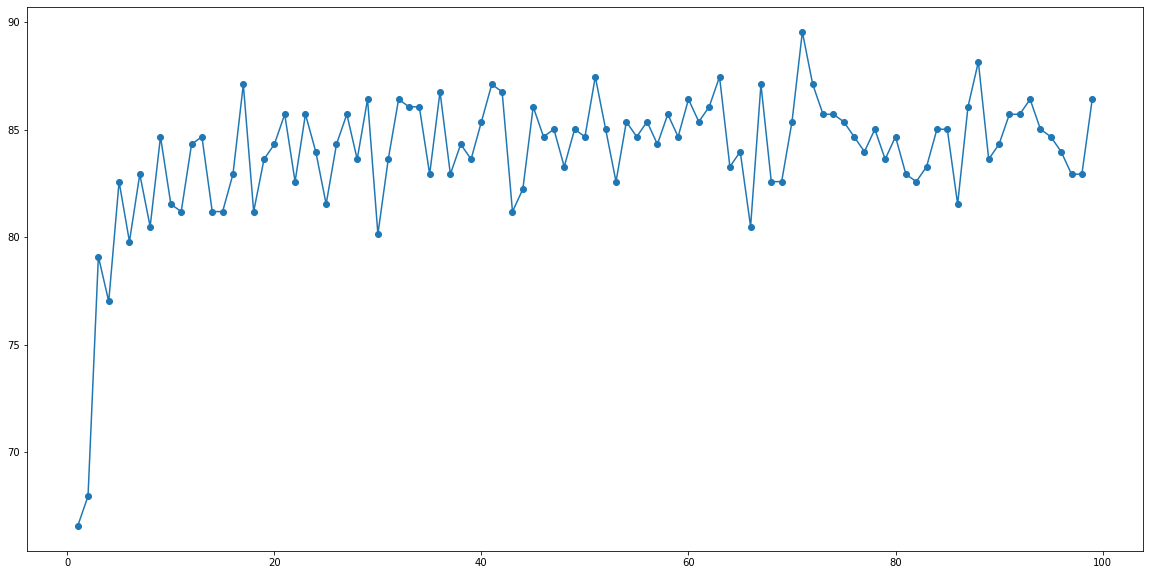

In [78]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(index, accuracyList,'-o')